In [1]:
import numpy as np
import pandas as pd # 정형데이터 전처리 / 통계 연산 수행

import seaborn as sns # 통계적 시각화 연산
import matplotlib as mpl # 시각화 옵션 (외부)
import matplotlib.pyplot as plt # 시각화 옵션 (내부)
import plotly.express as px # 동적 그래프 시각화
import scipy.stats as stats # 통계적 가설 검정 수행

#!pip install scikit-learn
from sklearn.model_selection import train_test_split # 머신러닝 데이터 split
from sklearn.tree import DecisionTreeClassifier # 분류모델
from sklearn.metrics import accuracy_score # 머신러닝 평가
from sklearn.metrics import classification_report # 분류모델의 성능 측정함수

mpl.rc('font',family='Malgun Gothic') # 한글 글꼴 설정

---
> # **공정 데이터, 품질 검사 데이터 분석**
> ### **시간 데이터에 대한 전처리 방법**
> - #### df1_process : 10분 단위
> - #### df1_detect : 4시간 단위
---

In [2]:
df1_detect = pd.read_csv("09_Detection.csv",index_col=0)
df1_process = pd.read_csv("09_Process_A.csv",index_col=0)

In [3]:
df1_process.head()

,Unnamed: 0,DATE,PERIOD,Label,A1,A2,A3,A4,A5,A6
0,0,2018-12-01T00:10:00,P1,AVG,225.637279,228.533316,230.788205,230.634245,232.112927,230.630909
1,1,2018-12-01T00:20:00,P1,AVG,225.763044,228.519014,230.428961,230.936762,231.899435,230.564272
2,2,2018-12-01T00:30:00,P1,AVG,225.637431,228.040479,230.276102,230.359142,231.650512,230.317974
3,3,2018-12-01T00:40:00,P1,AVG,224.906854,227.645375,229.837444,229.830891,231.075795,229.694517
4,4,2018-12-01T00:50:00,P1,AVG,224.798077,227.710191,229.888123,229.962605,231.004184,229.586533


In [4]:
df1_detect.head()

,date_clean,tag,tag_num,unit,Y1A,Y2A,Y3A
0,2018-12-01 03:30:00.000,NE280V,GO1701,Total [1/m²],4954.774,327.416,256.882
1,2018-12-01 07:30:00.005,NE280PV,GO1701,Total [1/m²],2281.460,44.410,17.416
2,2018-12-01 11:30:00.010,NE280V,GO1701,Total [1/m²],4453.201,74.017,23.511
3,2018-12-01 15:30:00.015,NE280PV,GO1701,Total [1/m²],4352.190,77.500,37.444
4,2018-12-01 19:30:00.020,NE280V,GO1701,Total [1/m²],4345.224,62.697,40.927


---
> ### **공정 데이터에 품질 검사 데이터의 4시간 단위를 기준으로 병합**
> - #### **inner join을 했는데, 마이크로초 때문에 제대로 병합되지 않음**
---

In [5]:
df1_process['datetime'] = pd.to_datetime(df1_process["DATE"])
df1_detect['datetime'] = pd.to_datetime(df1_detect['date_clean'])

In [6]:
pd.merge(df1_process,df1_detect,on='datetime',how='inner')

,Unnamed: 0,DATE,PERIOD,Label,A1,A2,A3,A4,A5,A6,datetime,date_clean,tag,tag_num,unit,Y1A,Y2A,Y3A
0,20,2018-12-01T03:30:00,P1,AVG,224.638902,227.413493,229.905499,229.657359,230.931185,229.420348,2018-12-01 03:30:00,2018-12-01 03:30:00.000,NE280V,GO1701,Total [1/m²],4954.774,327.416,256.882
1,956,2018-12-07T15:30:00,P1,AVG,227.751893,228.723087,229.902814,228.443784,228.029362,225.876851,2018-12-07 15:30:00,2018-12-07 15:30:00.000,NE280PV,1701,Total [1/m²],8267.433,619.995,409.988
2,1196,2018-12-18T07:30:00,P2,AVG,228.722661,230.766230,231.967395,231.500405,231.207897,229.468540,2018-12-18 07:30:00,2018-12-18 07:30:00.000,NE280PV,1701,Total [1/m²],13048.733,138.455,68.792
3,1364,2018-12-19T11:30:00,P2,AVG,230.624575,232.421385,233.634697,233.103240,232.760809,230.813041,2018-12-19 11:30:00,2018-12-19 11:30:00.000,NE280PV,1701,Total [1/m²],15506.726,274.298,122.543
4,1628,2018-12-21T07:30:00,P2,AVG,229.297436,231.142277,232.586504,231.924987,231.753184,230.049808,2018-12-21 07:30:00,2018-12-21 07:30:00.000,NE280PV,1701,Total [1/m²],14480.274,360.169,211.553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,10592,2019-09-03T13:30:00,P3,AVG,229.108532,230.471937,230.888572,230.686614,229.439228,227.529035,2019-09-03 13:30:00,2019-09-03 13:30:00.000,E280PV,1701,Total [1/m²],22569.040,2422.528,1950.561
170,10604,2019-09-03T15:30:00,P3,AVG,228.894231,230.397130,231.012732,230.710081,229.776926,227.902789,2019-09-03 15:30:00,2019-09-03 15:30:00.000,NE282PV,1701,Total [1/m²],27633.534,3436.123,2903.202
171,10622,2019-09-03T18:30:00,P3,AVG,229.004528,230.446154,230.866429,230.840892,229.665830,227.779707,2019-09-03 18:30:00,2019-09-03 18:30:00.000,NE282PV,1701,Total [1/m²],14115.267,951.667,728.541
172,10628,2019-09-03T19:30:00,P3,AVG,229.249716,230.743679,231.029600,230.840803,229.704163,227.779644,2019-09-03 19:30:00,2019-09-03 19:30:00.000,NE282PV,1701,Total [1/m²],13207.919,788.144,605.793


In [7]:
df1_detect

,date_clean,tag,tag_num,unit,Y1A,Y2A,Y3A,datetime
0,2018-12-01 03:30:00.000,NE280V,GO1701,Total [1/m²],4954.774,327.416,256.882,2018-12-01 03:30:00.000
1,2018-12-01 07:30:00.005,NE280PV,GO1701,Total [1/m²],2281.460,44.410,17.416,2018-12-01 07:30:00.005
2,2018-12-01 11:30:00.010,NE280V,GO1701,Total [1/m²],4453.201,74.017,23.511,2018-12-01 11:30:00.010
3,2018-12-01 15:30:00.015,NE280PV,GO1701,Total [1/m²],4352.190,77.500,37.444,2018-12-01 15:30:00.015
4,2018-12-01 19:30:00.020,NE280V,GO1701,Total [1/m²],4345.224,62.697,40.927,2018-12-01 19:30:00.020
...,...,...,...,...,...,...,...,...
469,2019-09-03 15:30:00.000,NE282PV,1701,Total [1/m²],27633.534,3436.123,2903.202,2019-09-03 15:30:00.000
470,2019-09-03 18:30:00.000,NE282PV,1701,Total [1/m²],14115.267,951.667,728.541,2019-09-03 18:30:00.000
471,2019-09-03 19:30:00.000,NE282PV,1701,Total [1/m²],13207.919,788.144,605.793,2019-09-03 19:30:00.000
472,2019-09-03 23:30:00.000,NE282PV,1701,Total [1/m²],15553.431,1237.614,980.762,2019-09-03 23:30:00.000


---
> ### **해결방법 : 시간을 반올림하기 : round('T')**
> #### **Pandas 시간단위**
> - s : 초단위 / T : 분단위 / H : 시간 / D : 일 / B : 평일 기준
> - W : 주단위(일) / W-MON : 주단위(월)
> - M : 월단위(마지막일) / MS : 각 달의 첫날
> - Q-JAN : 각 분기의 첫달의 마지막 날 / Q-DEC : 각 분기의 마지막달의 마지막 날
---

In [8]:
df1_detect['dt_round']=df1_detect['datetime'].round('T')
df1_detect['dt_round']

0     2018-12-01 03:30:00
1     2018-12-01 07:30:00
2     2018-12-01 11:30:00
3     2018-12-01 15:30:00
4     2018-12-01 19:30:00
              ...        
469   2019-09-03 15:30:00
470   2019-09-03 18:30:00
471   2019-09-03 19:30:00
472   2019-09-03 23:30:00
473   2019-09-04 03:30:00
Name: dt_round, Length: 474, dtype: datetime64[ns]

In [9]:
pd.merge(df1_process,df1_detect,left_on='datetime',right_on='dt_round',how='inner')

,Unnamed: 0,DATE,PERIOD,Label,A1,A2,A3,A4,A5,A6,datetime_x,date_clean,tag,tag_num,unit,Y1A,Y2A,Y3A,datetime_y,dt_round
0,20,2018-12-01T03:30:00,P1,AVG,224.638902,227.413493,229.905499,229.657359,230.931185,229.420348,2018-12-01 03:30:00,2018-12-01 03:30:00.000,NE280V,GO1701,Total [1/m²],4954.774,327.416,256.882,2018-12-01 03:30:00.000,2018-12-01 03:30:00
1,44,2018-12-01T07:30:00,P1,AVG,225.430882,228.297069,230.934893,231.026156,231.795967,230.410629,2018-12-01 07:30:00,2018-12-01 07:30:00.005,NE280PV,GO1701,Total [1/m²],2281.460,44.410,17.416,2018-12-01 07:30:00.005,2018-12-01 07:30:00
2,68,2018-12-01T11:30:00,P1,AVG,229.063690,230.710820,232.028457,231.395510,231.208500,229.545857,2018-12-01 11:30:00,2018-12-01 11:30:00.010,NE280V,GO1701,Total [1/m²],4453.201,74.017,23.511,2018-12-01 11:30:00.010,2018-12-01 11:30:00
3,92,2018-12-01T15:30:00,P1,AVG,228.312661,229.785002,230.958881,230.267388,230.243133,228.489299,2018-12-01 15:30:00,2018-12-01 15:30:00.015,NE280PV,GO1701,Total [1/m²],4352.190,77.500,37.444,2018-12-01 15:30:00.015,2018-12-01 15:30:00
4,116,2018-12-01T19:30:00,P1,AVG,229.209428,230.345179,230.993988,230.115520,229.526814,227.565878,2018-12-01 19:30:00,2018-12-01 19:30:00.020,NE280V,GO1701,Total [1/m²],4345.224,62.697,40.927,2018-12-01 19:30:00.020,2018-12-01 19:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,10592,2019-09-03T13:30:00,P3,AVG,229.108532,230.471937,230.888572,230.686614,229.439228,227.529035,2019-09-03 13:30:00,2019-09-03 13:30:00.000,E280PV,1701,Total [1/m²],22569.040,2422.528,1950.561,2019-09-03 13:30:00.000,2019-09-03 13:30:00
444,10604,2019-09-03T15:30:00,P3,AVG,228.894231,230.397130,231.012732,230.710081,229.776926,227.902789,2019-09-03 15:30:00,2019-09-03 15:30:00.000,NE282PV,1701,Total [1/m²],27633.534,3436.123,2903.202,2019-09-03 15:30:00.000,2019-09-03 15:30:00
445,10622,2019-09-03T18:30:00,P3,AVG,229.004528,230.446154,230.866429,230.840892,229.665830,227.779707,2019-09-03 18:30:00,2019-09-03 18:30:00.000,NE282PV,1701,Total [1/m²],14115.267,951.667,728.541,2019-09-03 18:30:00.000,2019-09-03 18:30:00
446,10628,2019-09-03T19:30:00,P3,AVG,229.249716,230.743679,231.029600,230.840803,229.704163,227.779644,2019-09-03 19:30:00,2019-09-03 19:30:00.000,NE282PV,1701,Total [1/m²],13207.919,788.144,605.793,2019-09-03 19:30:00.000,2019-09-03 19:30:00


---
> ### **공정 데이터를 30분 단위로 묶어서 데이터 병합**
> - #### **공정 데이터를 30분 단위로 묶어서 평균을 계산하여 30분 단위로 계산된 공정값의 평균과 품질검사 데이터를 병합**
> - set_index : 특정항목을 Index로 지정
> - resample : 특정 단위별로 값을 계산
---

In [10]:
df1_process_30T = df1_process.set_index('datetime').resample("30T").mean()
df1_process_T = df1_process_30T.reset_index()

C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_9108\1454283556.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_process_30T = df1_process.set_index('datetime').resample("30T").mean()


In [11]:
df1 = pd.merge(df1_process_T,df1_detect,left_on='datetime',right_on='dt_round',how='inner')
df1

,datetime_x,Unnamed: 0,A1,A2,A3,A4,A5,A6,date_clean,tag,tag_num,unit,Y1A,Y2A,Y3A,datetime_y,dt_round
0,2018-12-01 03:30:00,21.0,224.699436,227.481265,229.793475,229.740466,230.942930,229.493260,2018-12-01 03:30:00.000,NE280V,GO1701,Total [1/m²],4954.774,327.416,256.882,2018-12-01 03:30:00.000,2018-12-01 03:30:00
1,2018-12-01 07:30:00,45.0,225.961776,228.662768,231.032141,230.985556,231.878389,230.443650,2018-12-01 07:30:00.005,NE280PV,GO1701,Total [1/m²],2281.460,44.410,17.416,2018-12-01 07:30:00.005,2018-12-01 07:30:00
2,2018-12-01 11:30:00,69.0,228.338453,230.019735,231.369379,230.724894,230.712800,229.034481,2018-12-01 11:30:00.010,NE280V,GO1701,Total [1/m²],4453.201,74.017,23.511,2018-12-01 11:30:00.010,2018-12-01 11:30:00
3,2018-12-01 15:30:00,93.0,228.439517,229.836001,230.997518,230.312817,230.200329,228.407141,2018-12-01 15:30:00.015,NE280PV,GO1701,Total [1/m²],4352.190,77.500,37.444,2018-12-01 15:30:00.015,2018-12-01 15:30:00
4,2018-12-01 19:30:00,117.0,229.207077,230.303531,230.998015,230.143217,229.513746,227.562275,2018-12-01 19:30:00.020,NE280V,GO1701,Total [1/m²],4345.224,62.697,40.927,2018-12-01 19:30:00.020,2018-12-01 19:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,2019-09-03 13:30:00,10593.0,229.164329,230.512538,230.989630,230.667716,229.536600,227.624842,2019-09-03 13:30:00.000,E280PV,1701,Total [1/m²],22569.040,2422.528,1950.561,2019-09-03 13:30:00.000,2019-09-03 13:30:00
469,2019-09-03 15:30:00,10605.0,229.041343,230.561685,231.005577,230.826786,229.778894,227.888726,2019-09-03 15:30:00.000,NE282PV,1701,Total [1/m²],27633.534,3436.123,2903.202,2019-09-03 15:30:00.000,2019-09-03 15:30:00
470,2019-09-03 18:30:00,10623.0,229.045385,230.481412,230.959132,230.813666,229.712553,227.812577,2019-09-03 18:30:00.000,NE282PV,1701,Total [1/m²],14115.267,951.667,728.541,2019-09-03 18:30:00.000,2019-09-03 18:30:00
471,2019-09-03 19:30:00,10629.0,228.988537,230.413237,230.810620,230.597595,229.505906,227.572600,2019-09-03 19:30:00.000,NE282PV,1701,Total [1/m²],13207.919,788.144,605.793,2019-09-03 19:30:00.000,2019-09-03 19:30:00


### 관리도 시각화
- 중심선 : 데이터의 대표값
- 관리 한계선 : 상한선 ; 평균 + 표준편차 *3

In [12]:
center = df1['A1'].mean()
UCL = center + df1['A1'].std()*3
LCL = center - df1['A1'].std()*3

In [13]:
df1_A1 = df1[['A1']].reset_index()
df1_A1['Center'] = center
df1_A1['UCL'] = UCL
df1_A1['LCL'] = LCL
df1_A1_cc = df1_A1.head(30)

<AxesSubplot: xlabel='index', ylabel='A1'>

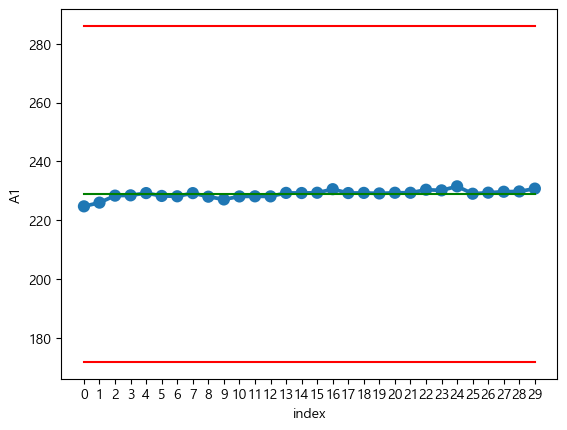

In [14]:
sns.pointplot(data=df1_A1_cc,x='index',y='A1')
sns.lineplot(data=df1_A1_cc,x='index',y='Center',color='g')
sns.lineplot(data=df1_A1_cc,x='index',y='UCL',color='r')
sns.lineplot(data=df1_A1_cc,x='index',y='LCL',color='r')

In [15]:
df1_A1 = df1[['A1']].reset_index()
df1_A1_cc = df1_A1.head(30)
df1_A1_cc['Center'] = df1_A1_cc['A1'].mean()
df1_A1_cc['UCL'] = df1_A1_cc['A1'].mean() + df1_A1_cc['A1'].std()*3
df1_A1_cc['LCL'] = df1_A1_cc['A1'].mean() - df1_A1_cc['A1'].std()*3

C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_9108\1462364974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_A1_cc['Center'] = df1_A1_cc['A1'].mean()
C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_9108\1462364974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_A1_cc['UCL'] = df1_A1_cc['A1'].mean() + df1_A1_cc['A1'].std()*3
C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_9108\1462364974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<AxesSubplot: xlabel='index', ylabel='A1'>

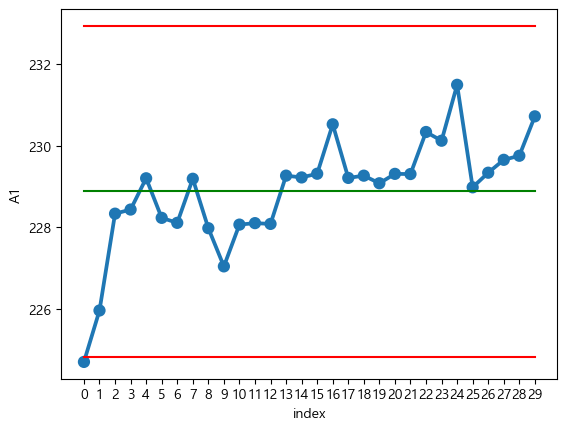

In [16]:
sns.pointplot(data=df1_A1_cc,x='index',y='A1')
sns.lineplot(data=df1_A1_cc,x='index',y='Center',color='g')
sns.lineplot(data=df1_A1_cc,x='index',y='UCL',color='r')
sns.lineplot(data=df1_A1_cc,x='index',y='LCL',color='r')

---
> ## **Mission 9**
---

### 1

In [17]:
df1.tag.value_counts()

NE280PV    373
NE282PV     74
NE280V      13
E280PV      13
Name: tag, dtype: int64

### 2

In [18]:
df1[df1.Y1A >= 3000].sort_values(by='Y1A',ascending=False).pivot_table(index='tag',values='A1',aggfunc='mean')

,A1
tag,
E280PV,176.522720
NE280PV,230.525440
NE280V,228.820843
NE282PV,230.657998


### 3

In [19]:
df1['Year'] = df1['dt_round'].dt.year
df1['Month'] = df1['dt_round'].dt.month
df1['Day'] = df1['dt_round'].dt.day
df1

,datetime_x,Unnamed: 0,A1,A2,A3,A4,A5,A6,date_clean,tag,tag_num,unit,Y1A,Y2A,Y3A,datetime_y,dt_round,Year,Month,Day
0,2018-12-01 03:30:00,21.0,224.699436,227.481265,229.793475,229.740466,230.942930,229.493260,2018-12-01 03:30:00.000,NE280V,GO1701,Total [1/m²],4954.774,327.416,256.882,2018-12-01 03:30:00.000,2018-12-01 03:30:00,2018,12,1
1,2018-12-01 07:30:00,45.0,225.961776,228.662768,231.032141,230.985556,231.878389,230.443650,2018-12-01 07:30:00.005,NE280PV,GO1701,Total [1/m²],2281.460,44.410,17.416,2018-12-01 07:30:00.005,2018-12-01 07:30:00,2018,12,1
2,2018-12-01 11:30:00,69.0,228.338453,230.019735,231.369379,230.724894,230.712800,229.034481,2018-12-01 11:30:00.010,NE280V,GO1701,Total [1/m²],4453.201,74.017,23.511,2018-12-01 11:30:00.010,2018-12-01 11:30:00,2018,12,1
3,2018-12-01 15:30:00,93.0,228.439517,229.836001,230.997518,230.312817,230.200329,228.407141,2018-12-01 15:30:00.015,NE280PV,GO1701,Total [1/m²],4352.190,77.500,37.444,2018-12-01 15:30:00.015,2018-12-01 15:30:00,2018,12,1
4,2018-12-01 19:30:00,117.0,229.207077,230.303531,230.998015,230.143217,229.513746,227.562275,2018-12-01 19:30:00.020,NE280V,GO1701,Total [1/m²],4345.224,62.697,40.927,2018-12-01 19:30:00.020,2018-12-01 19:30:00,2018,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,2019-09-03 13:30:00,10593.0,229.164329,230.512538,230.989630,230.667716,229.536600,227.624842,2019-09-03 13:30:00.000,E280PV,1701,Total [1/m²],22569.040,2422.528,1950.561,2019-09-03 13:30:00.000,2019-09-03 13:30:00,2019,9,3
469,2019-09-03 15:30:00,10605.0,229.041343,230.561685,231.005577,230.826786,229.778894,227.888726,2019-09-03 15:30:00.000,NE282PV,1701,Total [1/m²],27633.534,3436.123,2903.202,2019-09-03 15:30:00.000,2019-09-03 15:30:00,2019,9,3
470,2019-09-03 18:30:00,10623.0,229.045385,230.481412,230.959132,230.813666,229.712553,227.812577,2019-09-03 18:30:00.000,NE282PV,1701,Total [1/m²],14115.267,951.667,728.541,2019-09-03 18:30:00.000,2019-09-03 18:30:00,2019,9,3
471,2019-09-03 19:30:00,10629.0,228.988537,230.413237,230.810620,230.597595,229.505906,227.572600,2019-09-03 19:30:00.000,NE282PV,1701,Total [1/m²],13207.919,788.144,605.793,2019-09-03 19:30:00.000,2019-09-03 19:30:00,2019,9,3


### 4

In [20]:
df1.pivot_table(index='Day',values='Y1A',aggfunc='sum')

,Y1A
Day,
1,126511.524
2,91771.302
3,289396.886
4,125731.877
5,144191.586
6,87539.926
7,77805.043
8,81396.942
9,35236.577


### 5

In [21]:
df1[df1.tag =='NE282PV'].set_index('dt_round').resample("D").mean().drop(['Unnamed: 0'],axis=1)

C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_9108\1503485941.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1[df1.tag =='NE282PV'].set_index('dt_round').resample("D").mean().drop(['Unnamed: 0'],axis=1)


,A1,A2,A3,A4,A5,A6,Y1A,Y2A,Y3A,Year,Month,Day
dt_round,,,,,,,,,,,,
2018-12-31,229.590635,230.662697,231.783269,230.581694,230.047135,228.058751,13168.031000,500.702000,272.556000,2018.0,12.0,31.0
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-30,233.151003,234.233224,234.195504,233.795056,232.303811,230.197380,7023.848333,1072.353333,898.972667,2019.0,8.0,30.0
2019-08-31,232.750798,233.945584,234.064988,233.674013,232.383873,230.342291,5830.620500,862.947667,679.185000,2019.0,8.0,31.0
2019-09-01,231.159783,232.517266,232.953834,232.549694,231.525954,229.506461,3761.683000,385.733000,374.406000,2019.0,9.0,1.0


### 6

In [22]:
df_clean = df1[df1.tag =='NE282PV'].set_index('dt_round').resample("D").mean().drop(['Unnamed: 0'],axis=1).dropna()
df_clean

C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_9108\3029800343.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clean = df1[df1.tag =='NE282PV'].set_index('dt_round').resample("D").mean().drop(['Unnamed: 0'],axis=1).dropna()


,A1,A2,A3,A4,A5,A6,Y1A,Y2A,Y3A,Year,Month,Day
dt_round,,,,,,,,,,,,
2018-12-31,229.590635,230.662697,231.783269,230.581694,230.047135,228.058751,13168.031000,500.702000,272.556000,2018.0,12.0,31.0
2019-01-14,230.820579,232.088655,233.016918,232.093023,231.618933,229.559233,13115.650000,646.257000,370.754000,2019.0,1.0,14.0
2019-01-15,230.923918,231.898059,233.000520,231.602043,231.059655,228.953803,13112.390000,1035.374000,592.019000,2019.0,1.0,15.0
2019-01-16,229.748754,230.840738,231.995553,230.715121,230.204467,228.094464,13707.048000,985.308000,646.294000,2019.0,1.0,16.0
2019-01-17,231.317947,232.260641,232.989705,231.925774,231.203691,229.096735,15551.227000,1066.451000,671.455000,2019.0,1.0,17.0
2019-01-19,229.235814,232.185980,234.400608,234.196921,234.559251,232.722947,15202.621600,1055.527400,607.487200,2019.0,1.0,19.0
2019-01-20,226.194814,229.397951,232.025752,232.183624,233.008756,231.314809,13649.881500,1098.003500,624.492500,2019.0,1.0,20.0
2019-01-21,231.314295,233.707146,235.510813,234.846598,234.621040,232.629906,14199.042000,998.792000,556.432000,2019.0,1.0,21.0
2019-01-25,229.602128,231.479119,233.073132,232.318212,232.230424,230.311868,15618.973000,1128.969000,558.580000,2019.0,1.0,25.0


In [24]:
df_clean_h = df_clean[['A5']].reset_index()
df_clean_h = df_clean_h.head(30)
df_clean_h['Center'] = df_clean_h['A5'].mean()
df_clean_h['UCL'] = df_clean_h['A5'].mean() + df_clean_h['A5'].std()*3
df_clean_h['LCL'] = df_clean_h['A5'].mean() - df_clean_h['A5'].std()*3
df_clean_h['index']=df_clean_h.index

In [25]:
df_clean_h

,dt_round,A5,Center,UCL,LCL,index
0,2018-12-31,230.047135,230.845092,236.343781,225.346404,0
1,2019-01-14,231.618933,230.845092,236.343781,225.346404,1
2,2019-01-15,231.059655,230.845092,236.343781,225.346404,2
3,2019-01-16,230.204467,230.845092,236.343781,225.346404,3
4,2019-01-17,231.203691,230.845092,236.343781,225.346404,4
5,2019-01-19,234.559251,230.845092,236.343781,225.346404,5
6,2019-01-20,233.008756,230.845092,236.343781,225.346404,6
7,2019-01-21,234.621040,230.845092,236.343781,225.346404,7
8,2019-01-25,232.230424,230.845092,236.343781,225.346404,8
9,2019-01-26,232.173861,230.845092,236.343781,225.346404,9


<AxesSubplot: xlabel='index', ylabel='A5'>

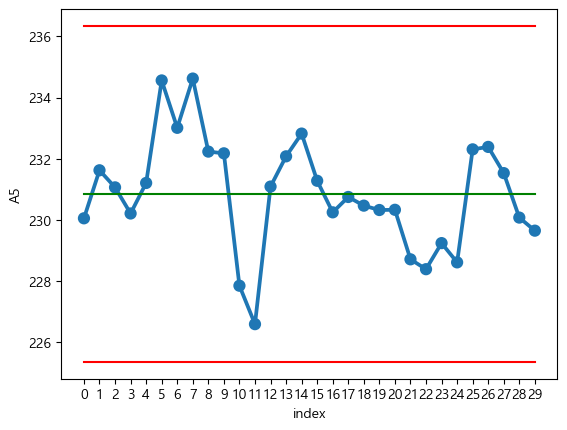

In [26]:
sns.pointplot(data=df_clean_h,x='index',y='A5')
sns.lineplot(data=df_clean_h,x='index',y='Center',color='g')
sns.lineplot(data=df_clean_h,x='index',y='UCL',color='r')
sns.lineplot(data=df_clean_h,x='index',y='LCL',color='r')